In [30]:
# %matplotlib notebook

In [31]:
# Dependencies and set up
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# File path and read csv
pathFile = "Resources/Cleaned_Salary_Data.csv"
cleanedSalaryData = pd.read_csv(pathFile)
cleanedSalaryData

,Metro,Dimension Type,Month,Dimension,Measure,Value,YoY
0,Atlanta,Job Title,2019-01,Data Scientist,Median Base Pay,"$100,304",0.90%
1,Atlanta,Job Title,2019-01,Data Analyst,Median Base Pay,"$66,636",2.90%
2,Boston,Job Title,2019-01,Data Scientist,Median Base Pay,"$112,119",0.90%
3,Boston,Job Title,2019-01,Data Analyst,Median Base Pay,"$72,037",3.00%
4,Chicago,Job Title,2019-01,Data Scientist,Median Base Pay,"$103,477",0.60%
...,...,...,...,...,...,...,...
195,San Francisco,Job Title,2020-05,Data Analyst,Median Base Pay,"$97,145",4.70%
196,Seattle,Job Title,2020-05,Data Scientist,Median Base Pay,"$138,522",6.20%
197,Seattle,Job Title,2020-05,Data Analyst,Median Base Pay,"$78,551",4.60%
198,Washington DC,Job Title,2020-05,Data Scientist,Median Base Pay,"$114,334",6.50%


In [4]:
# question 1a
# isolate May 2020
currentSalary = cleanedSalaryData[cleanedSalaryData['Month'] == "2020-05"]
currentSalary
# remove dimension type, measure and YoY
salaryCity = currentSalary[["Metro", "Dimension", "Value"]]
salaryCity

,Metro,Dimension,Value
180,Atlanta,Data Scientist,"$111,346"
181,Atlanta,Data Analyst,"$69,913"
182,Boston,Data Scientist,"$125,362"
183,Boston,Data Analyst,"$77,030"
184,Chicago,Data Scientist,"$112,504"
185,Chicago,Data Analyst,"$70,995"
186,Houston,Data Scientist,"$120,562"
187,Houston,Data Analyst,"$71,224"
188,Los Angeles,Data Scientist,"$128,747"
189,Los Angeles,Data Analyst,"$78,112"


In [4]:
# check data types
salaryCity.dtype

NameError: name 'salaryCity' is not defined

In [6]:
# change Value to numeric
salaryCity[salaryCity.columns[2:]] = salaryCity[salaryCity.columns[2:]].replace('[\$,]', '', regex=True).astype(float)
# salaryCity['Value'] = salaryCity['Value'].str.replace("%","")
salaryCity

C:\Users\kathl\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Metro,Dimension,Value
180,Atlanta,Data Scientist,111346.0
181,Atlanta,Data Analyst,69913.0
182,Boston,Data Scientist,125362.0
183,Boston,Data Analyst,77030.0
184,Chicago,Data Scientist,112504.0
185,Chicago,Data Analyst,70995.0
186,Houston,Data Scientist,120562.0
187,Houston,Data Analyst,71224.0
188,Los Angeles,Data Scientist,128747.0
189,Los Angeles,Data Analyst,78112.0


<IPython.core.display.Javascript object>


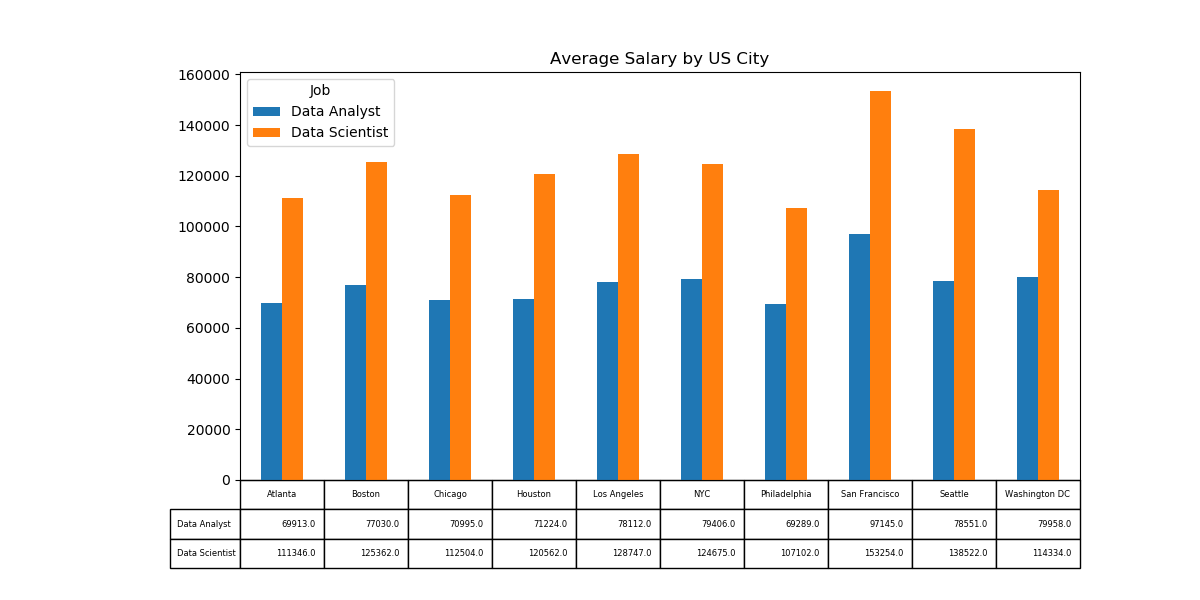

In [35]:
salaryCity = salaryCity.rename(columns={"Metro": "US City", "Dimension": "Job", "Value": "Salary"})
salaryCity
salaryCityBar = salaryCity.pivot("US City", "Job", "Salary").plot(kind="bar", 
                                                                  fontsize=10, rot=45, 
                                                                  figsize=(12, 6),
                                                                  title="Average Salary by US City", 
                                                                  table=True)
salaryCityBar.axes.get_xaxis().set_visible(False)
table = salaryCityBar.tables[0]
# Setting the font size
table.set_fontsize(15)
# Rescaling the rows to be more readable
table.scale(1,2)
# plt.x_label = "US City"
# plt.table(fontsize=10)
plt.y_label = "Salary"
plt.xticks([])
plt.subplots_adjust(left=0.2, bottom=0.2)
# plt.tight_layout()
plt.savefig("Resources/Salary_by_City.png")


In [8]:
cleanedSalaryData

,Metro,Dimension Type,Month,Dimension,Measure,Value,YoY
0,Atlanta,Job Title,2019-01,Data Scientist,Median Base Pay,"$100,304",0.90%
1,Atlanta,Job Title,2019-01,Data Analyst,Median Base Pay,"$66,636",2.90%
2,Boston,Job Title,2019-01,Data Scientist,Median Base Pay,"$112,119",0.90%
3,Boston,Job Title,2019-01,Data Analyst,Median Base Pay,"$72,037",3.00%
4,Chicago,Job Title,2019-01,Data Scientist,Median Base Pay,"$103,477",0.60%
...,...,...,...,...,...,...,...
195,San Francisco,Job Title,2020-05,Data Analyst,Median Base Pay,"$97,145",4.70%
196,Seattle,Job Title,2020-05,Data Scientist,Median Base Pay,"$138,522",6.20%
197,Seattle,Job Title,2020-05,Data Analyst,Median Base Pay,"$78,551",4.60%
198,Washington DC,Job Title,2020-05,Data Scientist,Median Base Pay,"$114,334",6.50%


In [9]:

# isolate May 2020
currentSalary = cleanedSalaryData[cleanedSalaryData['Month'] == "2020-05"]
currentSalary
# remove dimension type, measure and YoY
salaryYOY= currentSalary[["Metro", "Dimension", "YoY"]]
salaryYOY

,Metro,Dimension,YoY
180,Atlanta,Data Scientist,6.10%
181,Atlanta,Data Analyst,4.40%
182,Boston,Data Scientist,6.80%
183,Boston,Data Analyst,5.10%
184,Chicago,Data Scientist,7.00%
185,Chicago,Data Analyst,5.30%
186,Houston,Data Scientist,8.70%
187,Houston,Data Analyst,7.00%
188,Los Angeles,Data Scientist,6.20%
189,Los Angeles,Data Analyst,4.50%


In [10]:
# change Value to numeric
salaryYOY[salaryYOY.columns[2:]] = salaryYOY[salaryYOY.columns[2:]].replace('[\%,]', '', regex=True).astype(float)
salaryYOY

C:\Users\kathl\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Metro,Dimension,YoY
180,Atlanta,Data Scientist,6.1
181,Atlanta,Data Analyst,4.4
182,Boston,Data Scientist,6.8
183,Boston,Data Analyst,5.1
184,Chicago,Data Scientist,7.0
185,Chicago,Data Analyst,5.3
186,Houston,Data Scientist,8.7
187,Houston,Data Analyst,7.0
188,Los Angeles,Data Scientist,6.2
189,Los Angeles,Data Analyst,4.5


<IPython.core.display.Javascript object>


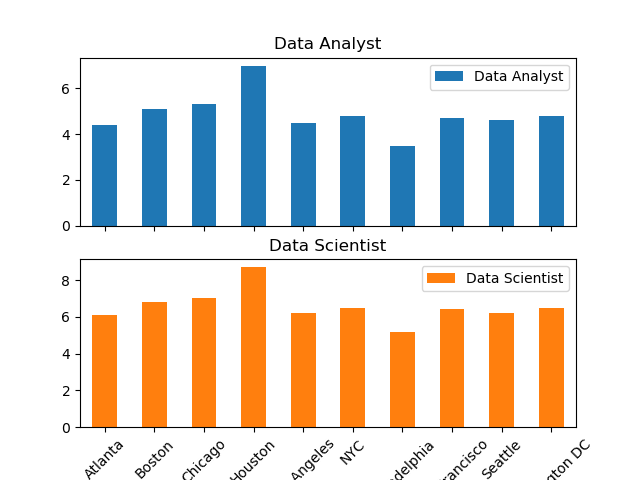

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002829FF6F908>,
      dtype=object)

In [11]:
salaryYOY.pivot("Metro", "Dimension", "YoY").plot(kind="bar", rot=45, fontsize=10, position=.5, subplots=True)

<IPython.core.display.Javascript object>


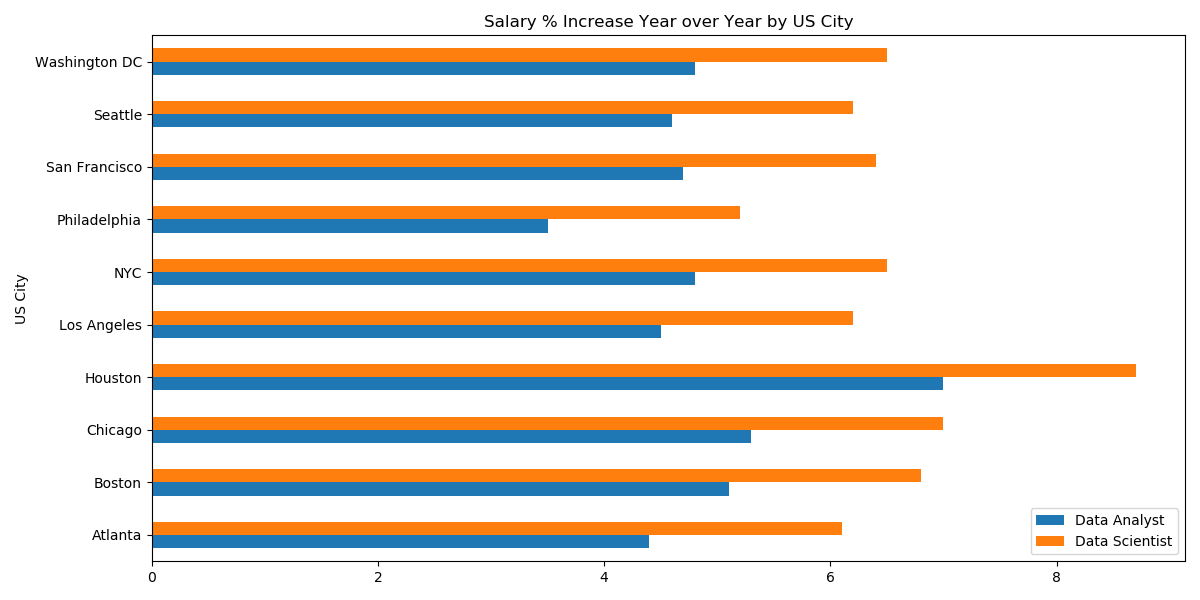

In [56]:
salaryYOY = salaryYOY.rename(columns={"Metro": "US City", "Dimension": "Job", "YoY": "% Increase Year over Year"})
salaryYOY

salaryYOY.pivot("US City", "Job", "% Increase Year over Year").plot(kind="barh", 
                                                  rot=0, fontsize=10, 
                                                  position=.5, 
                                                  figsize=(12, 6),                  
                                                  title="Salary % Increase Year over Year by US City",
                                                  legend=False)



# salaryCityBar = salaryCity.pivot("US City", "Job", "Salary").plot(kind="bar", 
#                                                                   fontsize=10, rot=45, 
#                                                                   figsize=(12, 6),
#                                                                   title="Salary % Increase YoY by US City", 
#                                                                   table=True)
# salaryCityBar.axes.get_xaxis().set_visible(False)
# table = salaryCityBar.tables[0]
# # Setting the font size
# table.set_fontsize(15)
# # Rescaling the rows to be more readable
# table.scale(1,2)
plt.y_label = "US City"
# plt.table(fontsize=10)
plt.x_label = "% Salary Increase YoY"
plt.legend(loc="lower right") 
plt.tight_layout()
plt.savefig("Resources/Salary_%_Increase_by_City_YoY.png")

In [1]:
# salaryYOY.pivot("Metro", "Dimension", "YoY").plot(kind="line")